以抛硬币为例说明贝叶斯后验

In [1]:
from typing import Literal
from scipy.integrate import quad
from math import comb
import seaborn as sns

import numpy as np

class CoinBayesPosterior:
    MU = 0.5
    SIGMA = 0.1
    BERNOULLI_PARAM = 0.7
    MULTINOMIAL_PARAM = [0.2, 0.3, 0.5]
    
    UP = 50
    TOTAL = 100
    
    def __init__(self, prior_distribution: Literal['Gauss', 'Bernoulli'] = 'Gauss') -> None:
        if prior_distribution == 'Gauss':
            self.prior = self.__gauss_distribution
        elif prior_distribution == 'Bernoulli':
            self.prior = self.__bernoulli_distribution
            
    def __gauss_distribution(self, x: float):
        return (1 / np.sqrt(2 * np.pi) * self.SIGMA) * np.exp(-(x - self.MU) ** 2/(2 * self.SIGMA ** 2))
    
    def __bernoulli_distribution(self, x: float):
        return self.BERNOULLI_PARAM ** x * (1 - self.BERNOULLI_PARAM) ** (1 - x)
    
    @property
    def evidence(self):
        def integrand(theta):
            return (theta ** self.UP * (1 - theta) ** (self.TOTAL - self.UP) * comb(self.TOTAL, self.UP)) * self.prior(theta)
        return quad(integrand, 0, 1)[0]
    
    def likelihood(self, theta):
        likehood = (theta ** self.UP * (1 - theta) ** (self.TOTAL - self.UP) * comb(self.TOTAL, self.UP))
        return likehood

In [2]:
theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
bayes = CoinBayesPosterior()
p1 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率

theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
CoinBayesPosterior.MU = 0.1
bayes = CoinBayesPosterior()
p2 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率

theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
CoinBayesPosterior.MU = 0.3
bayes2 = CoinBayesPosterior()
p3 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率
theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
CoinBayesPosterior.MU = 0.6
bayes2 = CoinBayesPosterior()
p4 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率
theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
CoinBayesPosterior.MU = 0.9
bayes2 = CoinBayesPosterior()
p5 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率

<Axes: >

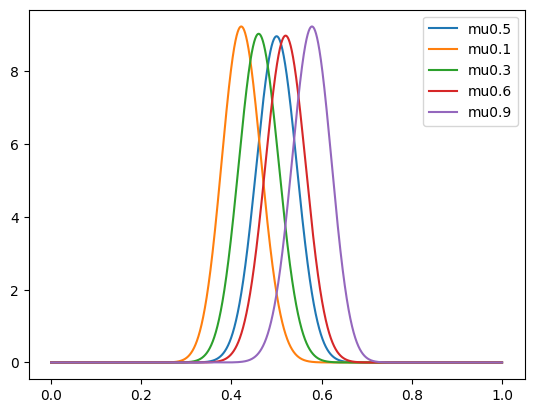

In [3]:
# 展示同一实验结果对不同先验的修正

sns.lineplot(x=theta_dist, y=p1, label='mu0.5')
sns.lineplot(x=theta_dist, y=p2, label='mu0.1')
sns.lineplot(x=theta_dist, y=p3, label='mu0.3')
sns.lineplot(x=theta_dist, y=p4, label='mu0.6')
sns.lineplot(x=theta_dist, y=p5, label='mu0.9')

In [4]:
theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围3
CoinBayesPosterior.UP = 10
bayes = CoinBayesPosterior()
p6 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率

theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
CoinBayesPosterior.UP = 30
bayes = CoinBayesPosterior()
p7 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率

theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围
CoinBayesPosterior.UP = 50
bayes2 = CoinBayesPosterior()
p8 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率
theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围

CoinBayesPosterior.UP = 70
bayes2 = CoinBayesPosterior()
p9 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率
theta_dist = np.arange(0.0001, 1, 0.0001) # 定义θ的取值范围

CoinBayesPosterior.UP = 90
bayes2 = CoinBayesPosterior()
p10 = bayes.likelihood(theta_dist) * bayes.prior(theta_dist) / bayes.evidence  # 计算后验概率

<Axes: >

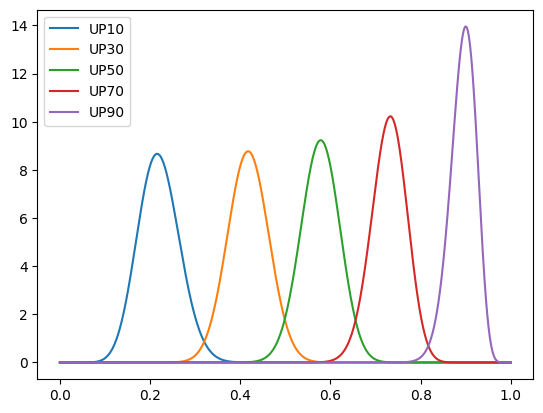

In [7]:
# 展示不同实验结果对相同先验的修正
# 以下实验结果的先验都是mu=0.5的高斯分布
sns.lineplot(x=theta_dist, y=p6, label='UP10')
sns.lineplot(x=theta_dist, y=p7, label='UP30')
sns.lineplot(x=theta_dist, y=p8, label='UP50')
sns.lineplot(x=theta_dist, y=p9, label='UP70')
sns.lineplot(x=theta_dist, y=p10, label='UP90')